In [142]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras

In [143]:
# load train data
train = pd.read_csv('train_flooding_data.csv')

train = train.fillna(0)
x_train = train.drop(columns=['Label'])
x_train['ID'] = x_train['ID'].replace('id', '', regex=True)
x_train = x_train.astype('float64').values
y_train = train['Label'].astype('int').values

In [144]:
# load test data
test = pd.read_csv('test_flooding_data.csv')

test = test.fillna(0)
x_test = test.drop(columns=['Label'])
x_test['ID'] = x_test['ID'].replace('id', '', regex=True)
x_test = x_test.astype('float64').values
y_test = test['Label'].astype('int').values

In [145]:
# reshape the input data to have an extra dimension for the batch size
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [146]:
# define the model architecture
model = keras.Sequential()

# Add convolutional layers
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(6, 1)))
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(strides=1))

# Add a flatten layer
model.add(keras.layers.Flatten())

# Add dense layers
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 4, 32)             128       
                                                                 
 conv1d_33 (Conv1D)          (None, 2, 64)             6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                     

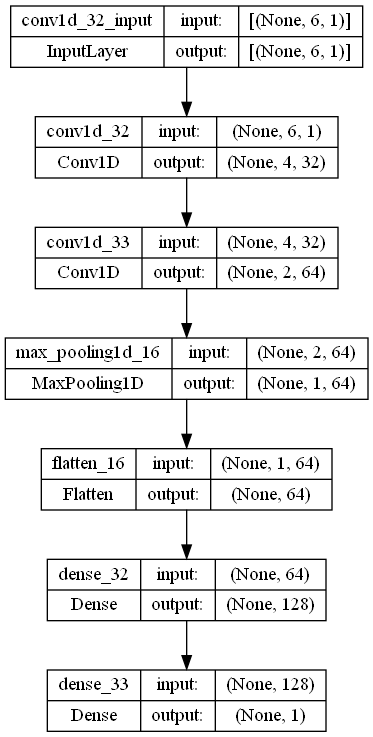

In [147]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [148]:
# train the model
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=1)

57956/57956 [==============================] - 51s 868us/step - loss: 418.0543 - accuracy: 0.7015 - val_loss: 0.6793 - val_accuracy: 0.6481


16099/16099 [==============================] - 8s 501us/step
Accuracy: 0.6736224209518966
Precision: 0.3603783571513941
Recall: 0.13906128526439235
F1 score: 0.20068361928395873
AUC: 0.5179839104324819
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79    363379
           1       0.36      0.14      0.20    151782

    accuracy                           0.67    515161
   macro avg       0.54      0.52      0.50    515161
weighted avg       0.61      0.67      0.62    515161



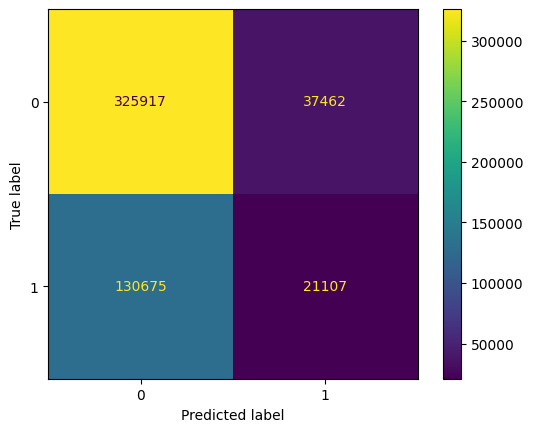

In [149]:

# # Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the probabilities to binary predictions
y_pred = np.round(y_pred)

# Calculate the evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)
print('AUC:', auc)
print('Classification report:\n', class_report)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot()

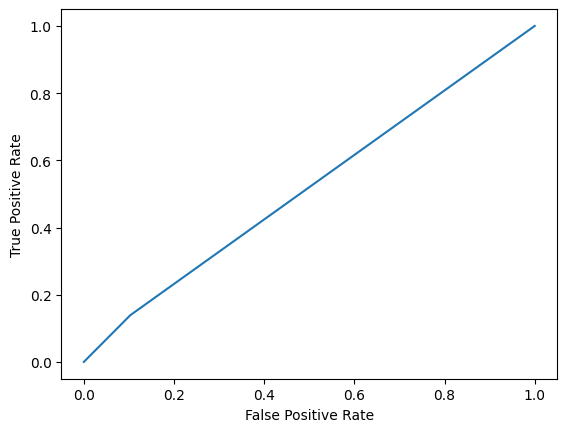

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()